In [1]:
import praw 
# PRAW is a module used for scraping data off Reddit.

import pandas as pd
# Pandas is imported as it is the primary module used for tabulating data.

import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib and Seaborn are imported for the purposes of data visualisation.

reddit = praw.Reddit(client_id='', client_secret='', user_agent='')
# Here, a read-only reddit instance is created by passing in the client_id, client_secret, and user_agent keyword arguments, 
# all of which are obtained by creating an application through OAuth2.

In [2]:
redditsports = reddit.subreddit('sports')
# The r/sports subreddit is selected for the project and an instance of the subreddit class is obtained

In [3]:
posts = []
# An empty list is created and assigned to "posts" for the purposes of containing data scraped from the subreddit.

for post in redditsports.top(limit=1000):
# A ListingGenerator is returned for the top submissions in the subreddit.
# The keyword argument "limit" specifies how many submissions should be fetched.
    
    posts.append([post.title, post.score, post.num_comments, post.created_utc, post.link_flair_text, post.url])
    # Each post is iterated in a for loop, and we specify the attributes that we want to be appended to the empty list.

df = pd.DataFrame(posts,columns=['Title', 'Upvotes', 'Total comments', 'Date created', 'Flair', 'url'])
# And finally, the fetched data is then turned into a Pandas DataFrame.
# The fetched attributes are accordingly assigned into their relevant columns.

df

,Title,Upvotes,Total comments,Date created,Flair,url
0,Weightlifter promised his wife to win an Olymp...,142814,2377,1.513431e+09,Picture/Video,https://i.imgur.com/DfatAr8.gifv
1,The LA Rams have an assistant coach whose job ...,110242,2793,1.548105e+09,:football: Football,https://v.redd.it/t88lypa2dub21
2,A Pelicans fan snuck on to the court for warmu...,104145,2103,1.517246e+09,Basketball,https://i.imgur.com/itfqSxh.gifv
3,Jon Rahm skips the ball across the pond for th...,102688,1707,1.605034e+09,:golf: Golf,https://v.redd.it/jl6d4pb5lgy51
4,"""Just stay in there, you're done for tonight""",102033,1570,1.519838e+09,Hockey,https://i.imgur.com/Vde2DtX.gifv
...,...,...,...,...,...,...
981,High School heavyweight Gable Steveson celebra...,27106,1356,1.520266e+09,None,https://v.redd.it/2lufozkqvyj01
982,"Emma Raducanu, ranked 150th in world, wins US ...",27105,1023,1.631398e+09,:tennis: Tennis,https://www.theguardian.com/sport/live/2021/se...
983,Finishing 3rd while carrying the camera rig is...,27084,741,1.542038e+09,:run: Running,https://i.imgur.com/KEEJ3D3.gifv
984,"FIFA no longer considers ""corruption"" a violat...",27084,999,1.534240e+09,:soccer: Soccer,https://apnews.com/d165d80179aa4117a260a1a5e65...


In [4]:
df['Flair'] = df['Flair'].str.replace(':?(.*?):', '', regex=True)
# The primary focus of this data set are sports categories, represented by submission flairs.
# As these flairs are messy and contain contain reddit jargon such as terms contained in colons, 
# we have to remove these terms via Dataframe.str.replace.

df = df.dropna()
# As there are "none" values in the data set, we proceed to use DataFrame.dropna to remove those rows to clean it up.

df = df[df['Flair'].str.contains("Picture/Video|News/Discussion|Media|Title violation|News|Actually a boy, we know. Calm.|QUALITY SHITPOST|On the left") == False]
# Furthermore, a substantial number of cells in the "Flair" column contain categorisations that do not represent a sport,
# so we use DataFrame.str.contains to filter restructure the data set to remove all the categories we do not need.

In [5]:
df['Date created'] = pd.to_datetime(df['Date created'], unit='s')
# As the "post created" reddit data is collected as UNIX timestamps,
# we use pandas.to_datetime to convert it into YYYY-MM-DD, HH:MM:SS for readability.


In [6]:
df2 = df.copy()
# As we do not intend to modify the original dateframe any further, 
# we make a copy of it to serve as a base for tabulation and visualisation.

df2['Flair'] = df2['Flair'].str.replace(' ', '')
# A quick check showed that there are still whitespaces that look normal on the csv, 
# but greatly hinder any categorisations of the data in pandas.
# Therefore, we use DataFrame.str.replace to remove them.


# df2.to_csv('rscrape.csv')
#The commented line above is used to export the data set to a csv file.

df2

,Title,Upvotes,Total comments,Date created,Flair,url
1,The LA Rams have an assistant coach whose job ...,110242,2793,2019-01-21 21:14:03,Football,https://v.redd.it/t88lypa2dub21
2,A Pelicans fan snuck on to the court for warmu...,104145,2103,2018-01-29 17:06:07,Basketball,https://i.imgur.com/itfqSxh.gifv
3,Jon Rahm skips the ball across the pond for th...,102688,1707,2020-11-10 18:53:30,Golf,https://v.redd.it/jl6d4pb5lgy51
4,"""Just stay in there, you're done for tonight""",102033,1570,2018-02-28 17:18:55,Hockey,https://i.imgur.com/Vde2DtX.gifv
6,Dwyane Wade was very pleased with this no-look...,97621,1703,2018-01-19 16:00:47,Basketball,https://i.imgur.com/eAik31G.gifv
...,...,...,...,...,...,...
979,Shaq blocks a shot off the backboard so hard t...,27119,523,2020-06-08 15:56:59,Basketball,https://i.imgur.com/XCJj1rd.gifv
980,The tee retriever for New Mexico State works r...,27115,315,2018-08-27 01:32:34,Football,https://v.redd.it/5fa7oet5hji11
982,"Emma Raducanu, ranked 150th in world, wins US ...",27105,1023,2021-09-11 22:11:19,Tennis,https://www.theguardian.com/sport/live/2021/se...
983,Finishing 3rd while carrying the camera rig is...,27084,741,2018-11-12 15:46:27,Running,https://i.imgur.com/KEEJ3D3.gifv


In [7]:
df3 = df2.copy()
# For the purposes of using the groupby operation on the dataframe, we will make another copy of it.

df3 = df3.groupby(['Flair']).sum()
# Here we use the DataFrame.groupby operation along with DataFrame.sum to return a dataframe with the sum of each Flair. 

df3 = df3.sort_values(by='Upvotes', ascending=False).reset_index()
# DataFrame.sort_values is then used to sort the data by Upvotes in descending order.

df3.head(10)
# As we can see from our data here, (American) Football is the most upvoted flair, followed by Basketball and Soccer.

,Flair,Upvotes,Total comments
0,Football,5822345,212519
1,Basketball,5173421,143630
2,Soccer,4557251,124484
3,Baseball,3769382,95940
4,Hockey,1642378,38007
5,Tennis,1204852,34524
6,Fighting,1151961,41545
7,Motorsports,869383,28428
8,Golf,831865,19366
9,Olympics,570491,23190


In [8]:
df3.tail(10)
# The least upvoted flair out of the Top 1000 posts is Squash, followed by Surfing and Racing.

,Flair,Upvotes,Total comments
35,Archery,51195,1973
36,Ultimate,46951,1148
37,Cornhole,44362,2648
38,Badminton,37885,570
39,Snooker,35857,1003
40,AustralianRulesFootball,35277,631
41,Diving,34996,573
42,Racing,32095,572
43,Surfing,30929,1067
44,Squash,30447,608


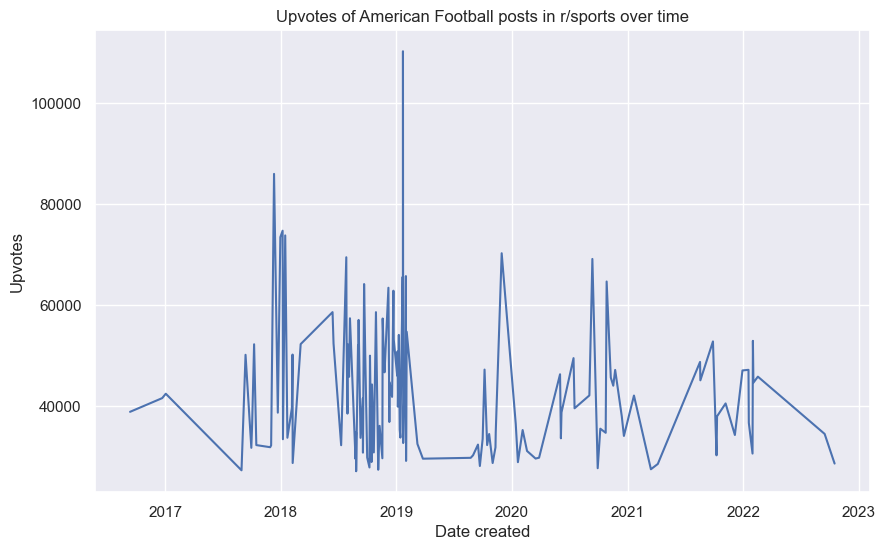

In [9]:
sns.set_theme()
# We now begin to use Matplotlib and Seaborn to plot our data.

df4 = df2.copy()
# A copy of the base df2 dataframe is made to avoid modifying it.

df4.rename(columns={'Flair': 'Sport'}, inplace=True)
# We rename the 'Flair' column to 'Sport' to make it easier for the normal viewer to understand.

fbtime = df4.query("Sport=='Football'")
# DataFrame.query filters the dataframe to what you specify in its parameters. In this case, (American) Football.

fig, ax = plt.subplots(figsize=(10, 6))
# plt.subplots is used here to define the size of the graph.

sns.lineplot(data=fbtime, x='Date created', y='Upvotes').set(title='Upvotes of American Football posts in r/sports over time')
# As we are plotting a sport against date created, a simple way of visualising it is via a line graph.

plt.show()
# The graph shows us an outlier that is far above the others, specifically the data point in early 2019.

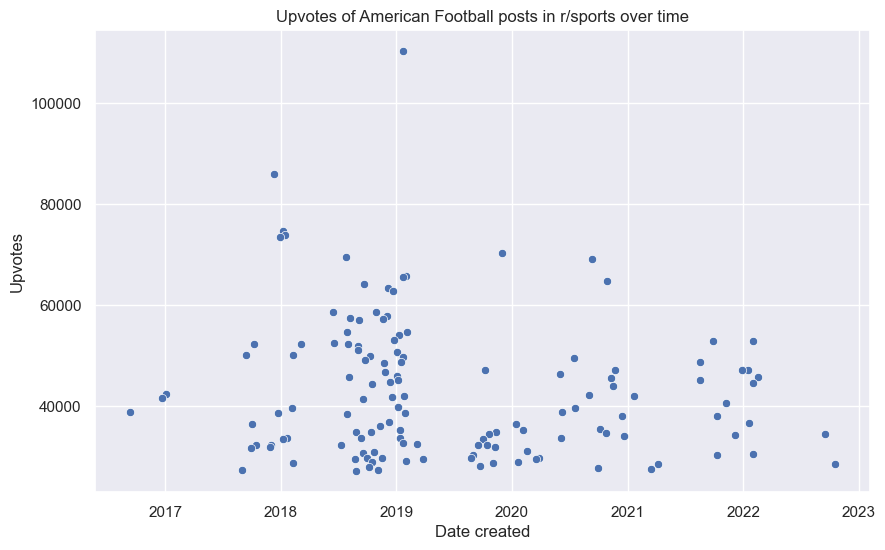

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=fbtime, x='Date created', y='Upvotes').set(title='Upvotes of American Football posts in r/sports over time')
plt.show()
# Using a scatter plot, we can confirm that there are indeed a few outliers that stand out from the rest.

In [11]:
fbtime.head(10)
# By taking a look at the dataframe created by df.query, we can see the outliers.

,Title,Upvotes,Total comments,Date created,Sport,url
1,The LA Rams have an assistant coach whose job ...,110242,2793,2019-01-21 21:14:03,Football,https://v.redd.it/t88lypa2dub21
23,Buffalo Bills take the field in blizzard condi...,85970,2268,2017-12-10 18:10:08,Football,https://i.imgur.com/gxcvDID.gifv
54,Cleveland Browns fans hold parade after histor...,74726,2081,2018-01-06 20:17:03,Football,https://i.imgur.com/zz2DMuP.jpg
58,The Vikings score on a last second touchdown t...,73789,4521,2018-01-15 01:08:37,Football,https://streamable.com/2jqws
61,NFL punter Jon Ryan had a special message for ...,73444,1020,2017-12-30 15:11:31,Football,https://i.imgur.com/qOo9feE.jpg
74,"Ryan ""Sticky Hands"" Griffin Touchdown Celebration",70265,946,2019-11-29 15:10:23,Football,https://v.redd.it/kws5ssxp5n141
77,A fan for life.,69468,1792,2018-07-26 22:40:06,Football,https://i.imgur.com/wC6FdP4.gifv
80,"The Chiefs and Texans, arm-in-arm in a show of...",69133,4913,2020-09-11 00:36:03,Football,https://v.redd.it/mfj3y617zem51
103,Brandin Cooks of the LA Rams presents the team...,65739,1478,2019-01-31 03:57:46,Football,https://v.redd.it/h6feay2tlod21
105,Controversial No Call on a Potential Pass Inte...,65591,5717,2019-01-20 23:12:03,Football,https://v.redd.it/mgw0pvp4unb21


In [12]:
fbtime.loc[1, 'Title']
# Using loc (or iloc) we can see the full title of the top outlier.

"The LA Rams have an assistant coach whose job is to make sure Head Coach Sean McVay doesn't run into the officials"

In [13]:
fbtime.head(10)
# Half of the Top 10 entries here are posts from January of each year.

,Title,Upvotes,Total comments,Date created,Sport,url
1,The LA Rams have an assistant coach whose job ...,110242,2793,2019-01-21 21:14:03,Football,https://v.redd.it/t88lypa2dub21
23,Buffalo Bills take the field in blizzard condi...,85970,2268,2017-12-10 18:10:08,Football,https://i.imgur.com/gxcvDID.gifv
54,Cleveland Browns fans hold parade after histor...,74726,2081,2018-01-06 20:17:03,Football,https://i.imgur.com/zz2DMuP.jpg
58,The Vikings score on a last second touchdown t...,73789,4521,2018-01-15 01:08:37,Football,https://streamable.com/2jqws
61,NFL punter Jon Ryan had a special message for ...,73444,1020,2017-12-30 15:11:31,Football,https://i.imgur.com/qOo9feE.jpg
74,"Ryan ""Sticky Hands"" Griffin Touchdown Celebration",70265,946,2019-11-29 15:10:23,Football,https://v.redd.it/kws5ssxp5n141
77,A fan for life.,69468,1792,2018-07-26 22:40:06,Football,https://i.imgur.com/wC6FdP4.gifv
80,"The Chiefs and Texans, arm-in-arm in a show of...",69133,4913,2020-09-11 00:36:03,Football,https://v.redd.it/mfj3y617zem51
103,Brandin Cooks of the LA Rams presents the team...,65739,1478,2019-01-31 03:57:46,Football,https://v.redd.it/h6feay2tlod21
105,Controversial No Call on a Potential Pass Inte...,65591,5717,2019-01-20 23:12:03,Football,https://v.redd.it/mgw0pvp4unb21


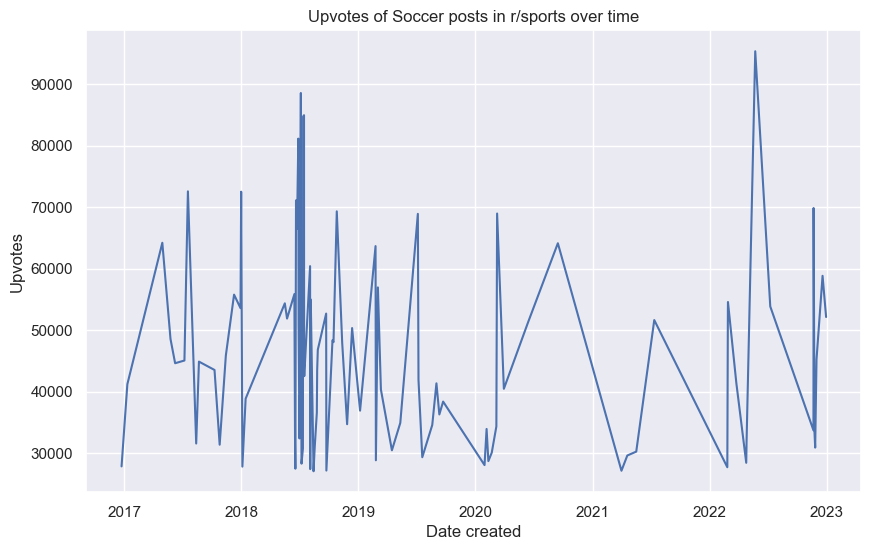

In [14]:
sctime = df4.query("Sport=='Soccer'")
# This time, we filter only the entries that are flaired with Soccer.

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=sctime, x='Date created', y='Upvotes').set(title='Upvotes of Soccer posts in r/sports over time')

plt.show()
# The surge in activity in mid-2018 appears to coincide with the hosting of the 2018 FIFA World Cup.

In [15]:
sctime.head(10)
# Here we can also see it reflected in the top 10 posts flaired with Soccer.

,Title,Upvotes,Total comments,Date created,Sport,url
9,Mario Balotelli absolutely filthy goal earlier...,95355,1469,2022-05-22 19:24:14,Soccer,https://v.redd.it/u7liaqlyv2191
20,Watching the World Cup penalty shootout betwee...,88569,2104,2018-07-05 19:31:14,Soccer,https://v.redd.it/nzooxv0bl6811
25,"France may have won the world cup, but Croatia...",84961,2704,2018-07-15 16:50:42,Soccer,https://i.redd.it/j4c2ikm065a11.png
27,Don’t be like Nikola Kalinic,84740,1799,2018-07-12 23:14:31,Soccer,https://i.redd.it/mxfm2karnl911.jpg
32,Mexican fans went to the Korean embassy and ma...,81150,1986,2018-06-27 21:22:31,Soccer,https://v.redd.it/hb0pyszu0m611
64,Team pulls off a beautiful goal despite terrib...,72582,1100,2017-07-18 14:17:26,Soccer,https://gfycat.com/AshamedSaltyCockatoo
65,Ronaldinho gets the wrong card,72521,1508,2017-12-31 16:38:13,Soccer,https://i.imgur.com/fhCOGvZ.gifv
69,Gareth Southgate consoling the Columbian playe...,71473,1928,2018-07-04 16:35:20,Soccer,https://i.redd.it/uqnb8gx8ly711.jpg
71,World Cup ending injury for Portugals Pepe,71116,4413,2018-06-20 17:28:16,Soccer,https://v.redd.it/qnx0v1tsx6511
75,Qatar becomes first Host Country to lose their...,69870,2231,2022-11-20 18:05:37,Soccer,https://www.thescore.com/worldcup/news/2488041


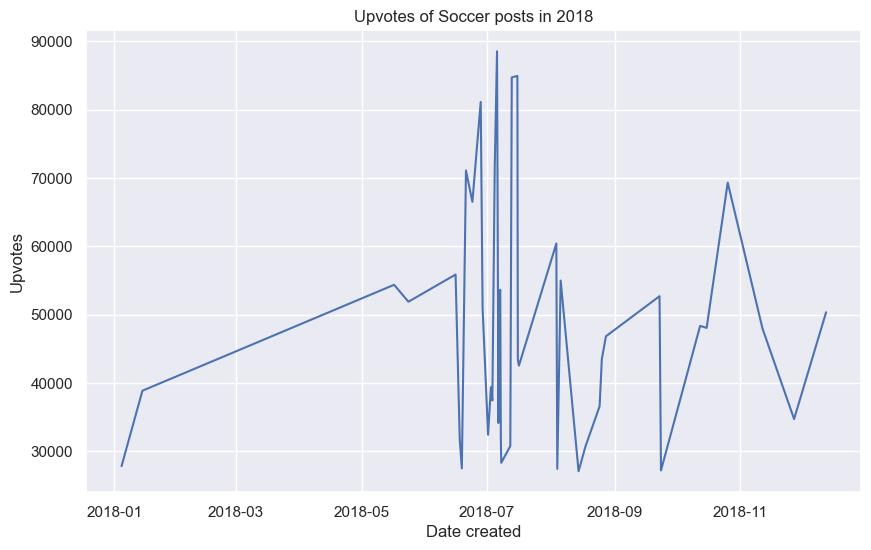

In [16]:
df5 = df4.loc[df4["Date created"].between("2018-01-01", "2018-12-31")]
# By using DataFrame.loc and .between, we can specify a specific date between which we want our data to lie in.

sctime2019 = df5.query("Sport==['Soccer']")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=sctime2019, x='Date created', y='Upvotes').set(title='Upvotes of Soccer posts in 2018')
plt.show()
# It is apparent in graph form that soccer's popularity is much higher during the World Cup than usual.